In [1]:
import numpy as np
import matplotlib.pyplot as plt
cmap = plt.get_cmap('tab10')

In [2]:
np.random.seed(42)

## Mock simulation and posterior

In [3]:
# Power law PDF.
def powerlaw(x, index, minimum, maximum):
    
    shape = x**index
    norm = (index+1) / (maximum**(index+1) - minimum**(index+1))
    cut = (x >= minimum) * (x <= maximum)
    
    return shape * norm * cut

# Sample from a power law PDF.
def sample_powerlaw(n_samples, index, minimum, maximum):
    
    return (
        np.random.rand(n_samples) * (maximum**(index+1) - minimum**(index+1))
        + minimum**(index+1)
        )**(1/(index+1))

In [4]:
# Sample a fiducial population of masses.

index = -2.3
minimum = 5
maximum = 50
n_sim = 10000 # Number of simulated mergers.

m_sim = sample_powerlaw(n_sim, index, minimum, maximum)

In [5]:
# Create mock parameter estimation posterior samples.

mean = maximum
std = 5
n_pe = 5000

m_pe = np.random.normal(mean, std, n_pe)

pe_prior = lambda m: (m >= m_pe.min()) * (m <= m_pe.max()) / (m_pe.max() - m_pe.min())

In [6]:
def plot_hists(pe, *sims):
    
    lo = min(pe.min(), min([sim.min() for sim in sims]))
    hi = max(pe.max(), max([sim.max() for sim in sims]))
    bins = np.linspace(lo, hi, 100)
    
    for i, m in enumerate([pe, *sims]):
        if i == 0:
            label = 'Event'
        else:
            label = f'Simulation {i}'
            
        plt.hist(
            m, density=True, bins=bins, histtype='step', color=cmap(i), label=label,
            )
        
        for cred in np.quantile(m, [.05, .95]):
            plt.axvline(cred, ls='--', c=cmap(i))
            
    plt.legend()
    plt.yscale('log')

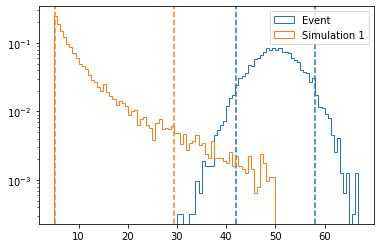

In [7]:
plot_hists(m_pe, m_sim)

## Model comparison to PE prior

In [8]:
from popodds import log_odds, ModelComparison

In [9]:
log_odds(m_sim[None, :], m_pe[None, :], pe_prior)

-1.568084126731545

In [17]:
ModelComparison(m_sim[None, :], m_pe[None, :], pe_prior)()

-1.568084126731545

## Comparison between two simulations

In [10]:
# Sample two mass populations

n_sim_A = 10000
index_A = -2.3
minimum_A = 5
maximum_A = 50

m_A = sample_powerlaw(n_sim_A, index_A, minimum_A, maximum_A)

n_sim_B = 12000
index_B = 0
minimum_B = 5
maximum_B = 100

m_B = sample_powerlaw(n_sim_B, index_B, minimum_B, maximum_B)

In [11]:
# Create mock parameter estimation posterior samples.

mean = 50
std = 5
n_pe = 5000

m_pe = np.random.normal(mean, std, n_pe)

pe_prior = lambda m: (m >= m_pe.min()) * (m <= m_pe.max()) / (m_pe.max() - m_pe.min())

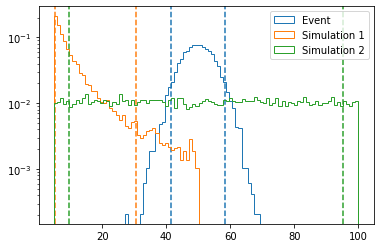

In [12]:
plot_hists(m_pe, m_A, m_B)

In [13]:
log_odds_A = log_odds(m_A, m_pe, pe_prior)
log_odds_B = log_odds(m_B, m_pe, pe_prior)

log_odds_AB = log_odds_A - log_odds_B

print(log_odds_A)
print(log_odds_B)
print(log_odds_AB)

-1.4020023772751524
-0.3767186083034354
-1.025283768971717
